# Introduction

This project will investigate relationships between data about different countries' life expectancy and GDP. The goals are to prepare and explore data, visualize the data to answer questions, and then seek to explain the findings.

The main questions we will answer are:

- How have countries' GDPs changed over time?
- How have countries' life expectancies changed over time?
- How does a country's GDP change with its life expectancy at birth?

Before we start comparing variables, let's explore our data!

**Data sources**

- Project prompt and CSV file: [Codecademy](https://www.codecademy.com/) Data Analyst course

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)

# Explore the data

### Import Python modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load and examine the data

We'll read the CSV file into a Pandas dataframe, then print the first few lines to get an idea of what the dataset looks like. We can also take a look at the size of the dataframe and the data types.

In [2]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


### There are 4 variables:

- country -- nominal -- string
- year -- discrete -- int
- life expectancy -- continuous -- float
- GDP -- continuous -- float

### Find unique country names

What are the countries included in the study?

In [4]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


### Find unique years

What are the years that a sample was taken?

In [5]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


### Rename variables

Let's rename 'United States of America' to 'US' for the sake of brevity.

In [6]:
df = df.replace('United States of America', 'US')
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'US' 'Zimbabwe']


### Rename Columns

Let's also rename the column "Life expectancy at birth (years)" to make it more managable. Calling `df.describe(include='all')` again should reflect this change and provide some high-level statistics to describe the dataset.

In [7]:
# rename columns
df.columns = ['country', 'year', 'life_expectancy', 'gdp']
df.describe(include='all')

,country,year,life_expectancy,gdp
count,96,96.000000,96.000000,9.600000e+01
unique,6,NaN,NaN,NaN
top,Chile,NaN,NaN,NaN
freq,16,NaN,NaN,NaN
mean,NaN,2007.500000,72.789583,3.880499e+12
std,NaN,4.633971,10.672882,5.197561e+12
min,NaN,2000.000000,44.300000,4.415703e+09
25%,NaN,2003.750000,74.475000,1.733018e+11
50%,NaN,2007.500000,76.750000,1.280220e+12
75%,NaN,2011.250000,78.900000,4.067510e+12


# Visualize the Data

Now that we've examined our dataset, it looks like our main variables are:

+ Country: six nominal variables of type `str`
+ Year: discrete variables ranging from 2000 - 2015, of type `int`
+ Life expectancy at birth (years): continuous variables of type `float`
+ GDP: continuous variables of type `float`

As an initial exploration, we can compare each country's life expectancies agaist each other with a boxplot. We will do the same for GDP.

## Comparing GDP and Life Expectancy across countries

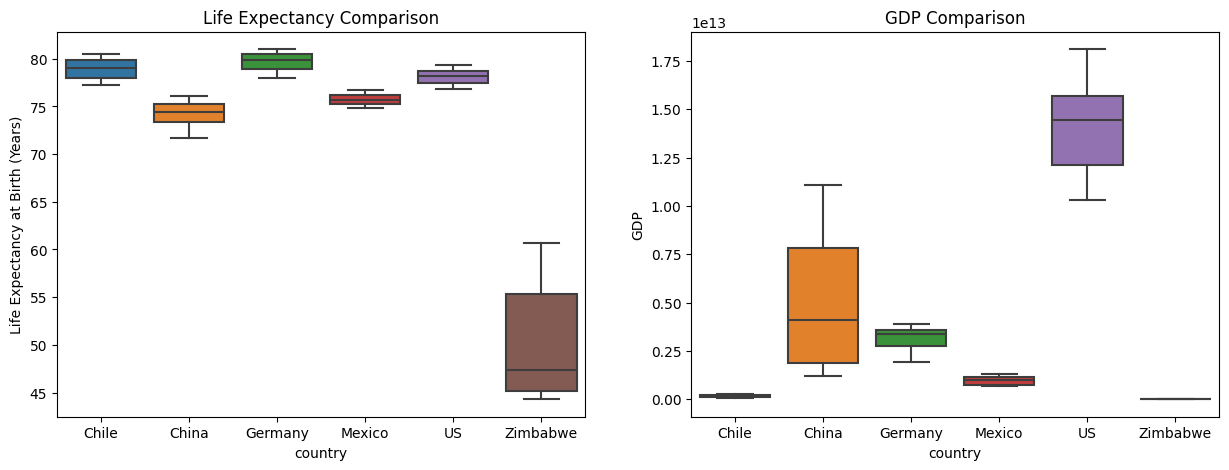

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0] = sns.boxplot(ax=ax[0], data=df, x='country', y='life_expectancy')
ax[0].set_ylabel('Life Expectancy at Birth (Years)')
ax[0].set_title('Life Expectancy Comparison')


ax[1] = sns.boxplot(ax=ax[1], data=df, x='country', y='gdp')
ax[1].set_ylabel('GDP in Tens of Trillions of USD')
ax[1].set_title('GDP Comparison')

plt.show()

## GDP vs Life Expectancy

Next, we examine the relationship between GDP and life_expectancy. It appears that there are large disparities between GDP. To make the data for each country more readable, we will create a subplot for each country.

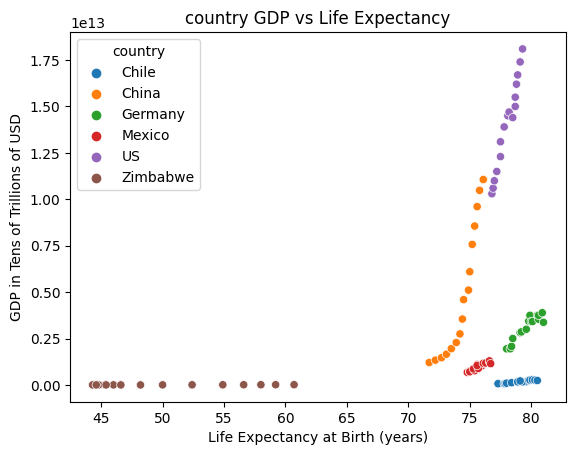

In [9]:
sns.scatterplot(data=df, x='life_expectancy', y='gdp', hue='country')
plt.xlabel('Life Expectancy at Birth (years)')
plt.ylabel('GDP in Tens of Trillions of USD')
plt.title('country GDP vs Life Expectancy')
plt.show()

We can see that China, the US, and Zimbabwe are spaced quite far apart from the rest of our countries. To make viewing easier, let's examine an individual scatter plot for each country.

## Plotting GDP vs Life Expectancy for Individual Countries

At a glance, we can see that GDP and life expectancy are correlated for each country in our dataset. However, when we plot each country seperately, the y-axis is no longer scaled to trillions of USD for every country, but rather on an easily viewable scale. While the graphs above make viewing correlation easy, the adjusted axis values make it difficult to easily compare values.

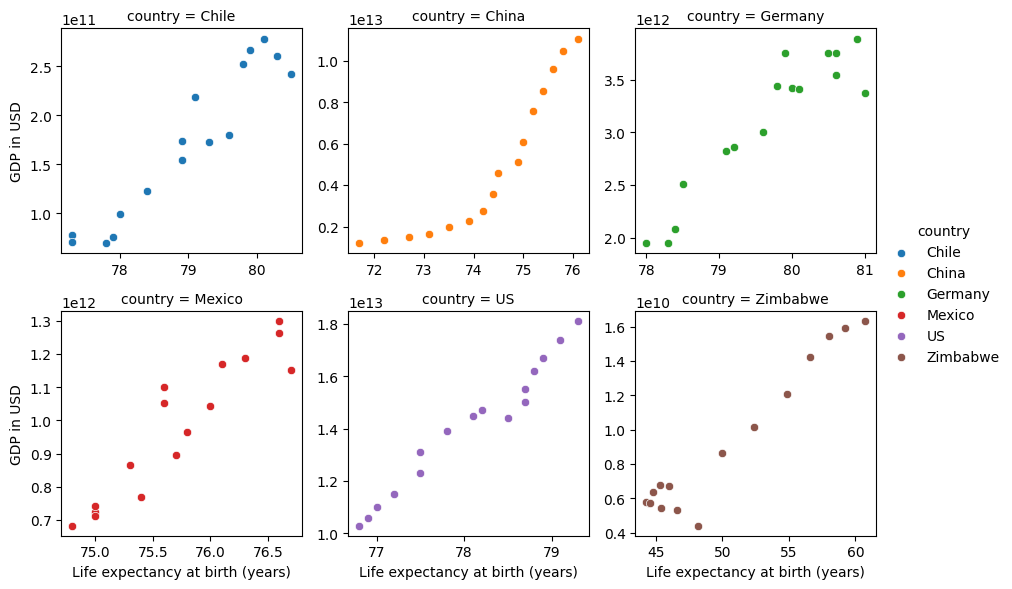

In [10]:
graph = sns.FacetGrid(data=df, col='country', col_wrap=3, hue = 'country', sharey = False, sharex = False, despine=False)
graph = (graph.map(sns.scatterplot,'life_expectancy', 'gdp')
         .add_legend()
         .set_axis_labels('Life expectancy at birth (years)', 'GDP in USD'))

## GDP and Life Expectancy over time

Finally, let's examine the changes in GDP and life expectancy over time.

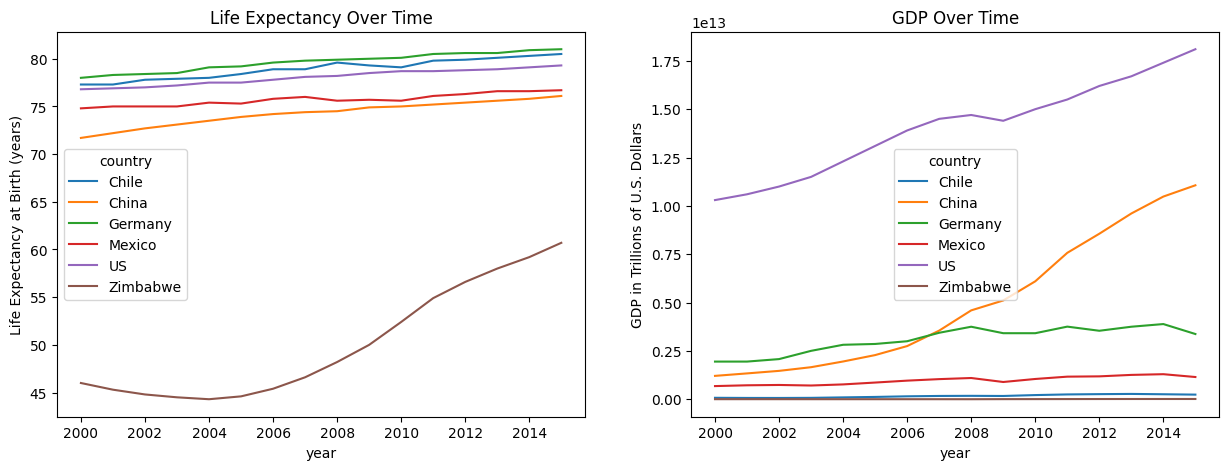

In [11]:
fig, axes = plt.subplots(1,2, figsize=(15,5))

axes[0] = sns.lineplot(ax=axes[0], x=df.year, y=df.life_expectancy, hue=df.country)
axes[0].set_ylabel('Life Expectancy at Birth (years)')
axes[0].set_title('Life Expectancy Over Time')

axes[1] = sns.lineplot(ax=axes[1], x=df.year, y=df.gdp, hue=df.country)
axes[1].set_ylabel('GDP in Trillions of U.S. Dollars')
axes[1].set_title('GDP Over Time')

plt.show()

# Conclusion

Answering our initial questions of:

- How have countries' GDPs changed over time?
- How have countries' life expectancies changed over time?

We've seen that all six countries have increased their life expectancy and GDP since 2000. However, Zimbabwe stands out for its drastic increase in life expectancy, while China and the US stand out for increases in GDP. When we graphed GDP with boxplots, the US had such a large value that other countries like Zimbabwe and Chile hardly registered visibly on the plot.

And as to the question of:

- How does a country's GDP change with its life expectancy at birth?

Despite enormous GDP values from the US, other countries like Chile and Germany still had higher life expectancies. This could prompt questions for further research. Do GDP increases only correlate to large life expectancy increases in lower-GDP countries like Zimbabwe? Or does Chile's high life expectancy but still lower-GDP negate the idea?